In [ ]:
pip install --upgrade pip

In [ ]:
pip install pandas scikit-learn Keras tensorflow matplotlib numpy

In [ ]:
pip install tensorflow==2.2.0

In [ ]:
pip install seaborn

# Import python dependencies.

In [112]:
import pandas as pd
import itertools
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and process data.

In [43]:
data = pd.read_csv("dataset/heart.csv")

In [18]:
# Check tdata types.
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [19]:
# Check missing values in heart disease datase.
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

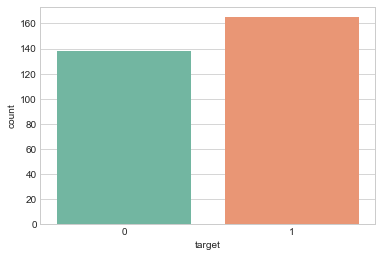

In [32]:
# Visualize the count of survivors.
sns.countplot(x='target', data=data)

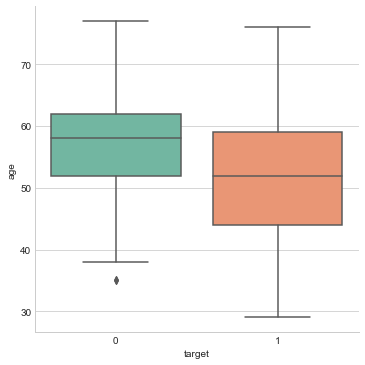

In [33]:
# Exploration of Age.
sns.catplot(x='target', y='age', data=data, kind='box')

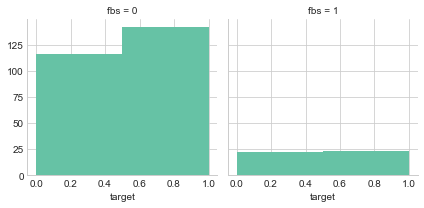

In [39]:
# Exploration of fasting blood sugar.
grid = sns.FacetGrid(data=data, col='fbs')
grid.map(plt.hist, 'target', bins=2)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
# This is the variable we want our machine learning model to predict based off all the others.
# 1 = Yes. Has heart disease 0 = No. Does not have heart disease.
x=data.iloc[:, 0:13]
y=data['target']

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


y[0:5]

# Split dataset into random train and test subsets

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Configures the model for training.

In [93]:
# Sequential model.
classifier = Sequential()
# Connected NN layer
classifier.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform', input_dim=13))
classifier.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
classifier.add(Dense(units=1, activation='sigmoid'))
# Configures the model for training
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Trains the model for a fixed number of epochs.

In [104]:
classifier.fit(x_train, y_train, batch_size=20, epochs=120)

Epoch 1/120
12/12 [==============================] - 0s 860us/step - loss: 0.3192 - binary_accuracy: 0.8722
Epoch 2/120
12/12 [==============================] - 0s 1ms/step - loss: 0.3237 - binary_accuracy: 0.8590
Epoch 3/120
12/12 [==============================] - 0s 951us/step - loss: 0.3351 - binary_accuracy: 0.8458
Epoch 4/120
12/12 [==============================] - 0s 779us/step - loss: 0.3358 - binary_accuracy: 0.8546
Epoch 5/120
12/12 [==============================] - 0s 955us/step - loss: 0.3190 - binary_accuracy: 0.8502
Epoch 6/120
12/12 [==============================] - 0s 919us/step - loss: 0.3256 - binary_accuracy: 0.8590
Epoch 7/120
12/12 [==============================] - 0s 921us/step - loss: 0.3166 - binary_accuracy: 0.8590
Epoch 8/120
12/12 [==============================] - 0s 819us/step - loss: 0.3175 - binary_accuracy: 0.8546
Epoch 9/120
12/12 [==============================] - 0s 742us/step - loss: 0.3313 - binary_accuracy: 0.8678
Epoch 10/120
12/12 [==========

In [105]:
prevision = classifier.predict(x_test)
prevision = (prevision > 0.5)

In [106]:
prevision[0:5]

array([[ True],
       [False],
       [False],
       [ True],
       [False]])

In [107]:
result = classifier.evaluate(x_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.4972 - binary_accuracy: 0.8026


Precision: is the ratio TP / (TP + FP) where TP is number of true positives and FP number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.


Recall: is the ratio TP / (TP + FN) where TP is the number of true positives and FN number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.


F-score: can be interpreted as a weighted harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The F score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall.


Support: is the number of occurrences of each class in y_test.

In [108]:
print(classification_report(y_test, prevision))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        36
           1       0.80      0.82      0.81        40

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



# Confusion Matrix.

In [109]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [110]:
matrix = confusion_matrix(prevision, y_test)
print(matrix)

[[28  7]
 [ 8 33]]


Confusion matrix, without normalization
[[28  7]
 [ 8 33]]
Normalized confusion matrix
[[0.8        0.2       ]
 [0.19512195 0.80487805]]


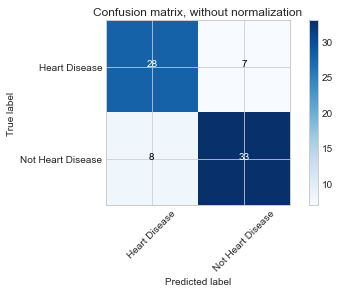

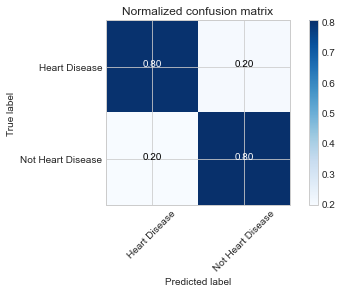

In [113]:
class_names = ['Heart Disease', 'Not Heart Disease']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=class_names, title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

# Save neural network and weights

In [115]:
# Save neural network
classifier_json = classifier.to_json()

with open('network/heart_disease_classifier.json', 'w') as json_file:
    json_file.write(classifier_json)

In [117]:
# Save weights
classifier.save_weights('model/heart_disease_classifier.h5')